#Load Required Libraries

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
import json
import pandas_datareader.data as web
import warnings
import requests
warnings.simplefilter('ignore')

#Exploring data

Upload and view data

In [ ]:
# read in Film_Permits data

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

Question 1: Check and see if the dataframe loaded correctly?

In [ ]:
df.head(1)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   

  track_artist  track_popularity          track_album_id  \
0   Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583         0.102               0.0    0.0653    0.518   

     tempo  duration_ms  
0  122.036       194754  

[1 rows x 23 columns]

In [ ]:
df.tail(1)

track_id              track_name  track_artist  \
32832  29zWqhca3zt5NsckZqDf6c  Typhoon - Original Mix  Julian Calor   

       track_popularity          track_album_id track_album_name  \
32832                27  0X3mUOm6MhxR7PzxG95rAo    Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
32832               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre  ... key  loudness  mode  speechiness  acousticness  \
32832            edm  ...   5    -4.571     0       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  
32832             0.341     0.742   0.0894  127.984       337500  

[1 rows x 23 columns]

Question 2: Examine the data types of the dataframe?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
df.shape

(32833, 23)

The dataframe contains 3081 rows and 15 columns

Let us explore the data a bit using describe(),columns,.dtypes

In [ ]:
df.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

In [ ]:
df.describe(include='all')

track_id track_name   track_artist  track_popularity  \
count                    32833      32828          32828      32833.000000   
unique                   28356      23449          10692               NaN   
top     7BKLCZ1jbUBVqRi2FVlTVw     Poison  Martin Garrix               NaN   
freq                        10         22            161               NaN   
mean                       NaN        NaN            NaN         42.477081   
std                        NaN        NaN            NaN         24.984074   
min                        NaN        NaN            NaN          0.000000   
25%                        NaN        NaN            NaN         24.000000   
50%                        NaN        NaN            NaN         45.000000   
75%                        NaN        NaN            NaN         62.000000   
max                        NaN        NaN            NaN        100.000000   

                track_album_id track_album_name track_album_release_date  \
count                    32833            32828                    32833   
unique                   22545            19743                     4530   
top     5L1xcowSxwzFUSJzvyMp48    Greatest Hits               2020-01-10   
freq                        42              139                      270   
mean                       NaN              NaN                      NaN   
std                        NaN              NaN                      NaN   
min                        NaN              NaN                      NaN   
25%                        NaN              NaN                      NaN   
50%                        NaN              NaN                      NaN   
75%                        NaN              NaN                      NaN   
max                        NaN              NaN                      NaN   

          playlist_name             playlist_id playlist_genre  ...  \
count             32833                   32833          32833  ...   
unique              449                     471              6  ...   
top     Indie Poptimism  4JkkvMpVl4lSioqQjeAL0q            edm  ...   
freq                308                     247           6043  ...   
mean                NaN                     NaN            NaN  ...   
std                 NaN                     NaN            NaN  ...   
min                 NaN                     NaN            NaN  ...   
25%                 NaN                     NaN            NaN  ...   
50%                 NaN                     NaN            NaN  ...   
75%                 NaN                     NaN            NaN  ...   
max                 NaN                     NaN            NaN  ...   

                 key      loudness          mode   speechiness  acousticness  \
count   32833.000000  32833.000000  32833.000000  32833.000000  32833.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        5.374471     -6.719499      0.565711      0.107068      0.175334   
std         3.611657      2.988436      0.495671      0.101314      0.219633   
min         0.000000    -46.448000      0.000000      0.000000      0.000000   
25%         2.000000     -8.171000      0.000000      0.041000      0.015100   
50%         6.000000     -6.166000      1.000000      0.062500      0.080400   
75%         9.000000     -4.645000      1.000000      0.132000      0.255000   
max        11.000000      1.275000      1.000000      0.918000      0.994000   

        instrumentalness      liveness       valence         tempo  \
count       32833.000000  32833.000000  32833.000000  32833.000000   
unique               NaN           NaN           NaN           NaN   
top                  NaN           NaN           NaN           NaN   
freq                 NaN           NaN           NaN           NaN   
mean    

In [ ]:
df.describe(include='object')

track_id track_name   track_artist  \
count                    32833      32828          32828   
unique                   28356      23449          10692   
top     7BKLCZ1jbUBVqRi2FVlTVw     Poison  Martin Garrix   
freq                        10         22            161   

                track_album_id track_album_name track_album_release_date  \
count                    32833            32828                    32833   
unique                   22545            19743                     4530   
top     5L1xcowSxwzFUSJzvyMp48    Greatest Hits               2020-01-10   
freq                        42              139                      270   

          playlist_name             playlist_id playlist_genre  \
count             32833                   32833          32833   
unique              449                     471              6   
top     Indie Poptimism  4JkkvMpVl4lSioqQjeAL0q            edm   
freq                308                     247           6043   

                playlist_subgenre  
count                       32833  
unique                         24  
top     progressive electro house  
freq                         1809

In [ ]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

After exploring the data I observed thatthe dataframe has:
1. 9 object type columns: 'track_id', 'track_name', 'track_artist','track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre'.
2. 1 datetime Type columns:'track_album_release_date',
3. 13 numerical columns: 'track_popularity','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms'

I will transform object type columns into 'category' data type. Also, I will transform the 'track_album_release_date' column into 'datetime' data type.

In [ ]:
# Convert object into a category
df[ 'track_id'] = df[ 'track_id'].astype('category')
df['track_name'] = df['track_name'].astype('category')
df['track_artist'] = df['track_artist'].astype('category')
df['track_album_id'] = df['track_album_id'].astype('category')
df['track_album_name'] = df['track_album_name'].astype('category')
df['playlist_name'] = df['playlist_name'].astype('category')
df['playlist_id'] = df['playlist_id'].astype('category')
df['playlist_genre'] = df['playlist_genre'].astype('category')
df['playlist_subgenre'] = df['playlist_subgenre'].astype('category')

In [ ]:
timefmt = "%Y-%m-%d %H:%M:%S"
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format = timefmt, errors='coerce')

In [ ]:
df.dtypes

track_id                          category
track_name                        category
track_artist                      category
track_popularity                     int64
track_album_id                    category
track_album_name                  category
track_album_release_date    datetime64[ns]
playlist_name                     category
playlist_id                       category
playlist_genre                    category
playlist_subgenre                 category
danceability                       float64
energy                             float64
key                                  int64
loudness                           float64
mode                                 int64
speechiness                        float64
acousticness                       float64
instrumentalness                   float64
liveness                           float64
valence                            float64
tempo                              float64
duration_ms                          int64
dtype: obje

#Cheak Duplicate data, data clean up, Missing data detection and Fill up

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [ ]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]
print(null_rows)

                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  ... key  \
8151              HIP

***What to do?

In [ ]:
#Drop the rows where at least one element is missing.
df=df.dropna()

In [ ]:
df.isna().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

#Visualizations & Discussions

Correlation Between Features:

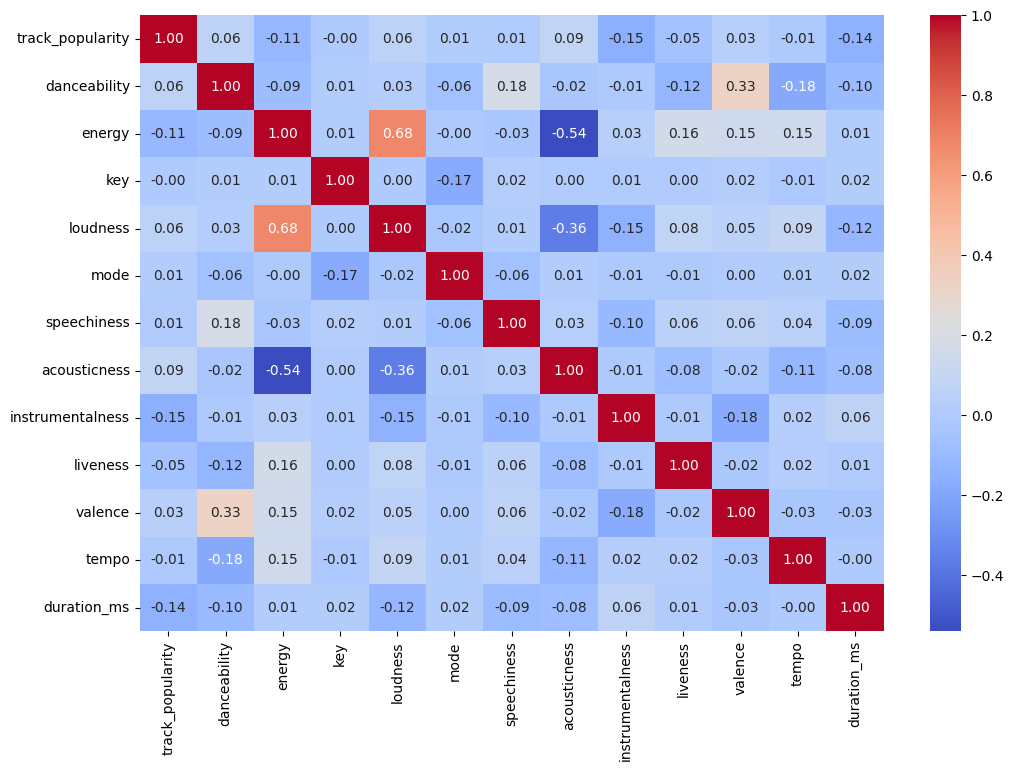

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

 the correlation plot indicates a strong relationship between the variables "energy" and "loudness." To further understand this relationship visually, we can plot a scatter plot.

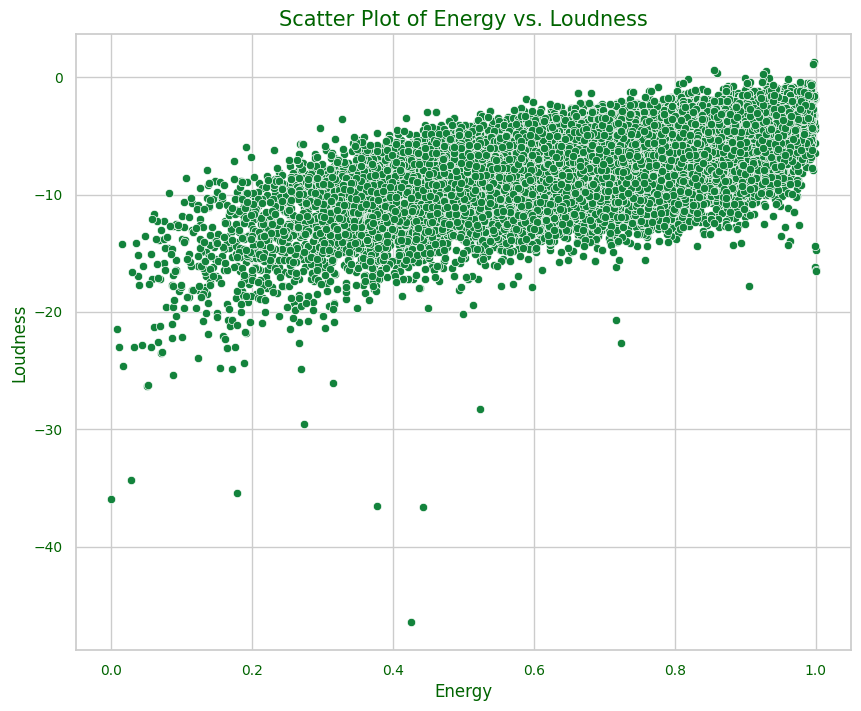

In [ ]:
# Create a scatter plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(x='energy', y='loudness', data=df, color="#13833c", palette="viridis")

plt.title("Scatter Plot of Energy vs. Loudness", fontsize=15, color="darkgreen")
plt.xlabel("Energy", fontsize=12, color="darkgreen")
plt.ylabel("Loudness", fontsize=12, color="darkgreen")
plt.xticks(fontsize=10, color="darkgreen")
plt.yticks(fontsize=10, color="darkgreen")

# Show the plot
plt.show()

Analyzing the Energy Distribution in Songs

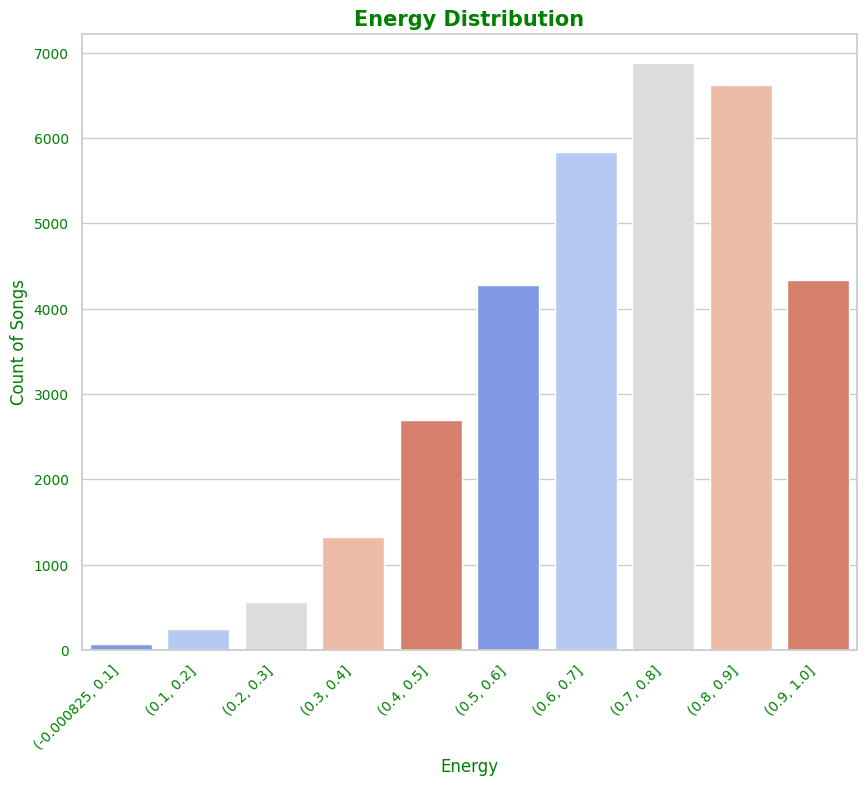

In [ ]:
# Create a new column 'energy_only' using cut
df['energy_only'] = pd.cut(df['energy'], bins=10)

# Create a bar plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

bar_plot = sns.countplot(x='energy_only', data=df, palette=sns.color_palette('coolwarm', n_colors=5))


plt.title("Energy Distribution", fontsize=15, fontweight="bold", color="green")
plt.xlabel("Energy", fontsize=12, color="green")
plt.ylabel("Count of Songs", fontsize=12, color="green")
plt.xticks(rotation=45, ha='right', fontsize=10, color="green")
plt.yticks(fontsize=10, color="green")

# Show the plot
plt.show()

#Genre Distribution

To visualize the distribution of the variables energy, danceability, valence, acousticness, speechiness, and liveness, we can plot their density plots together. Since all these variables have the same scale and range from 0 to 1, combining them in a single plot can provide a comprehensive view of their distributions.

 What differentiates songs of different genres?

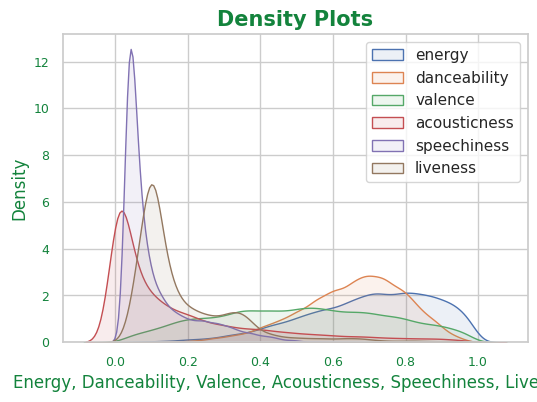

In [ ]:

plt.figure(figsize=(6, 4))  # Set the size of the figure

# Create density plots using seaborn
sns.set(style="whitegrid")  # Set background style

# Plot each density plot separately
for feature in ['energy', 'danceability', 'valence', 'acousticness', 'speechiness', 'liveness']:
    sns.kdeplot(data=df, x=feature, fill=True, alpha=0.1, label=feature)

# Customize the plot (you can adjust these as needed)
plt.title("Density Plots", fontsize=15, fontweight="bold", color="#13833c")
plt.xlabel("Energy, Danceability, Valence, Acousticness, Speechiness, Liveness", fontsize=12, color="#13833c")
plt.ylabel("Density", fontsize=12, color="#13833c")
plt.legend()
plt.xticks(fontsize=9, color="#13833c")
plt.yticks(fontsize=9, color="#13833c")

# Show the plot
plt.show()

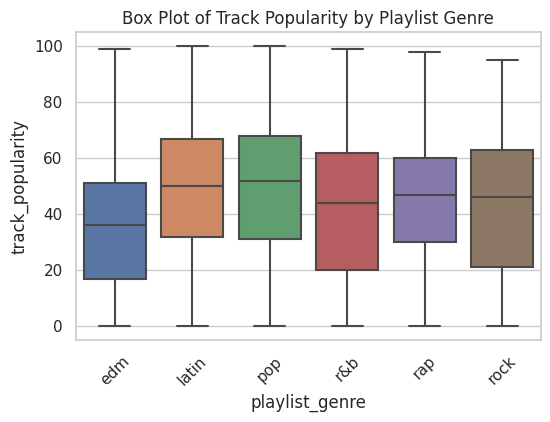

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='playlist_genre', y='track_popularity', data=df)
plt.title('Box Plot of Track Popularity by Playlist Genre')
plt.xticks(rotation=45)
plt.show()

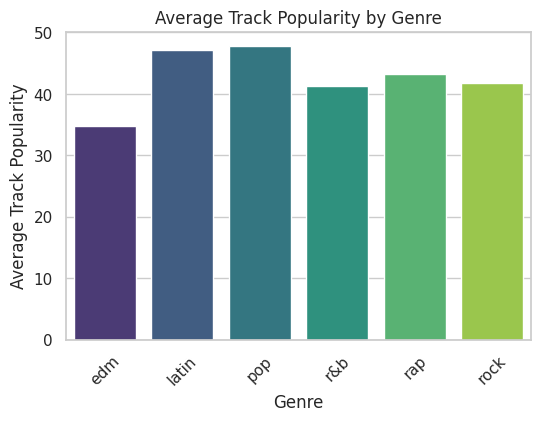

In [ ]:
average_popularity_by_genre = df.groupby('playlist_genre')['track_popularity'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='playlist_genre', y='track_popularity', data=average_popularity_by_genre, palette='viridis')
plt.title('Average Track Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Track Popularity')
plt.xticks(rotation=45)
plt.show()

1. Generally pop and latin tracks tend to be more popular
2. EDM tends to be the less popular genre

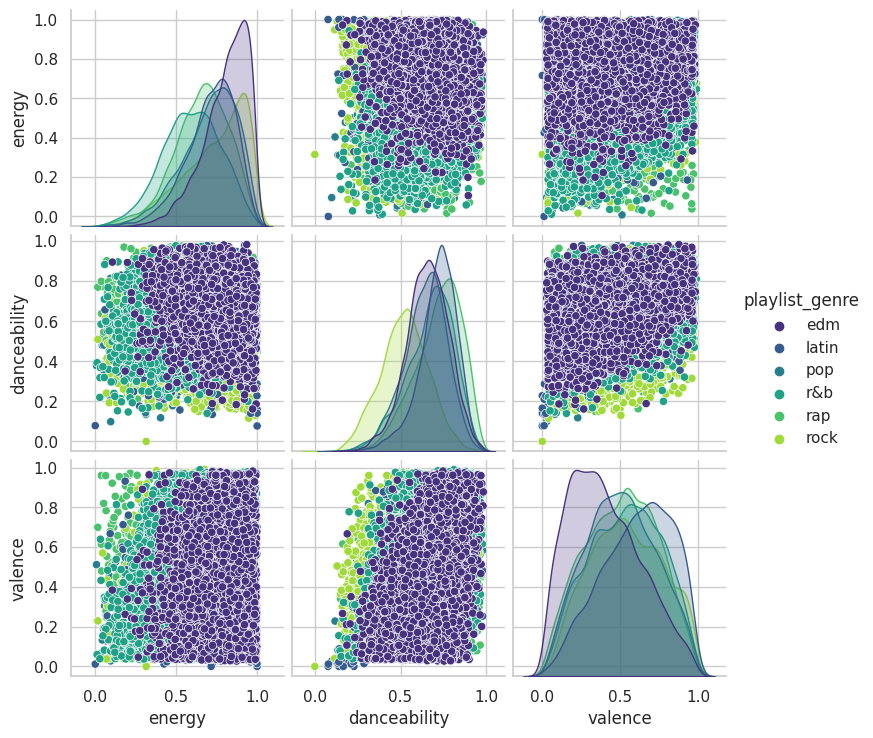

In [ ]:
sns.pairplot(df[['energy', 'danceability', 'valence', 'playlist_genre']], hue='playlist_genre', palette='viridis')
plt.show()

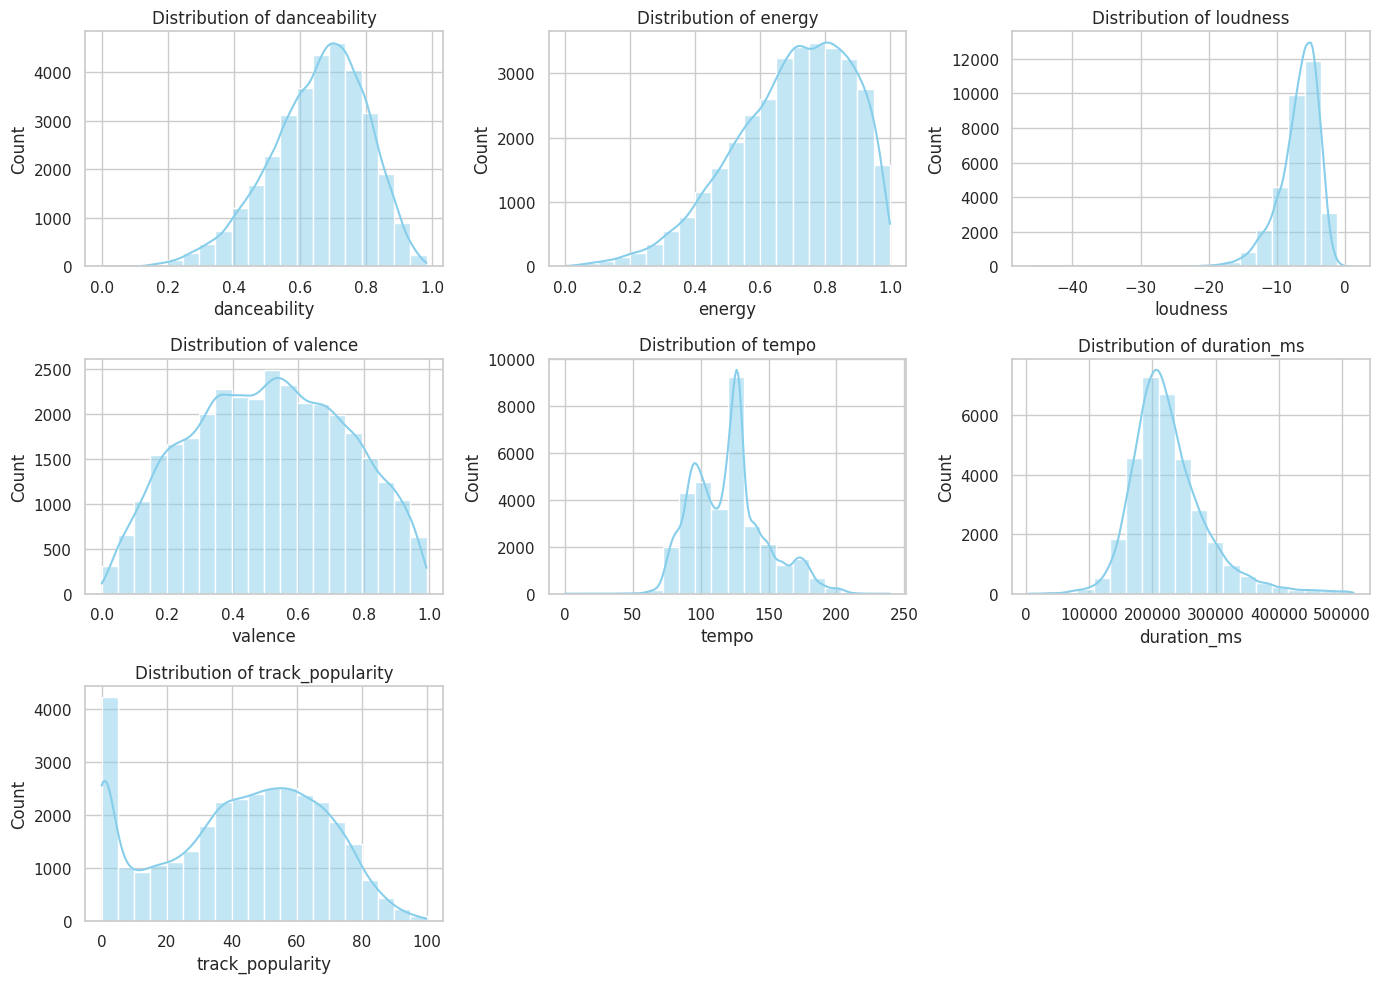

In [ ]:
numeric_cols = ['danceability', 'energy', 'loudness', 'valence', 'tempo', 'duration_ms', 'track_popularity']
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

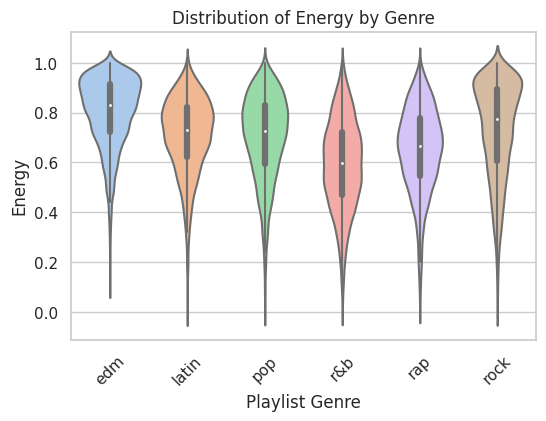

In [ ]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='playlist_genre', y='energy', data=df, palette='pastel')
plt.title('Distribution of Energy by Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.show()

1. Rock and edm tend to be more energetic
2. r&b songs are usually the least energetic

#Top Genres, Subgenres, and Chart-Topping Songs

In [ ]:
fig = px.parallel_coordinates(pd.concat([df.select_dtypes(float), df.track_popularity], axis=1),
                              color="track_popularity",
                              color_continuous_scale=px.colors.diverging.Spectral,
                              color_continuous_midpoint=50)
fig.show()

In [ ]:
df[['playlist_genre', 'playlist_subgenre']] = df[['playlist_genre', 'playlist_subgenre']] \
                                                  .apply(lambda x: x.str.capitalize(), axis=1)
fig = px.sunburst(df,
                  path=['playlist_genre', 'playlist_subgenre'],
                  color='track_popularity',
                  labels={'track_popularity': 'Popularity'})
fig.show()

In [ ]:
fig = px.treemap(df.groupby(['track_artist', 'track_name']).track_popularity.mean().sort_values(ascending=False).reset_index()[:100],
                 path=['track_artist', 'track_name'],
                 values='track_popularity',
                 title="Artists"
                )
fig.show()

In [ ]:
fig = px.treemap(df.groupby(['playlist_genre', 'playlist_subgenre']).track_popularity.agg(['count', 'mean']).reset_index(),
                 path=[px.Constant('Playlist Genres'), 'playlist_genre', 'playlist_subgenre'],
                 values='count',
                 color='mean',
                 labels={'mean': 'Popularity'},
                )
fig.show()

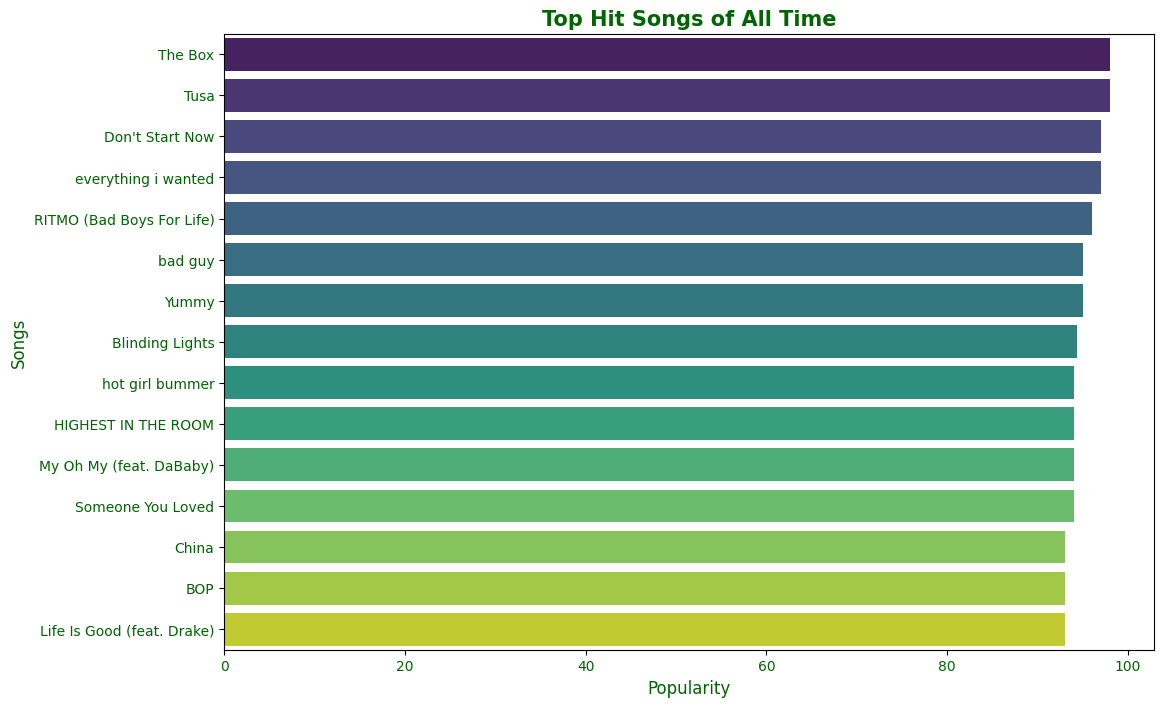

In [ ]:

# Group by track_name, calculate the number of tracks and the mean popularity
popular_artists = (
    df.groupby('track_name')
    .agg(No_of_tracks=('track_popularity', 'size'), Popularity=('track_popularity', 'mean'))
    .reset_index()
    .query('No_of_tracks > 2')
    .sort_values(by='Popularity', ascending=False)
    .head(15)
)

# Create a bar plot using seaborn and matplotlib
plt.figure(figsize=(12, 8))
sns.barplot(data=popular_artists, y='track_name', x='Popularity', palette='viridis')

# Customize the plot (you can adjust these as needed)
plt.title("Top Hit Songs of All Time", fontsize=15, fontweight="bold", color="darkgreen")
plt.xlabel("Popularity", fontsize=12, color="darkgreen")
plt.ylabel("Songs", fontsize=12, color="darkgreen")
plt.xticks(fontsize=10, color="darkgreen")
plt.yticks(fontsize=10, color="darkgreen")

# Show the plot
plt.show()


Musical Positiveness Conveyed by Tracks

The musical feature valence represents the emotional content of a song, specifically indicating the positivity or negativity of the expressed emotions.

In [ ]:
# Copy the DataFrame to avoid modifying the original
df_copy = df.copy()

# Create a new column 'valence_category' based on the specified conditions
df_copy['valence_category'] = pd.cut(
    df_copy['valence'],
    bins=[-float('inf'), 0.35, 0.7, float('inf')],
    labels=['Sad', 'Happy', 'Euphoric']
)

# Create a bar plot using Plotly Express
fig = px.histogram(df_copy, x='valence_category', color='valence_category',
                   labels={'valence_category': 'Valence'},
                   title="Valence wise Category",
                   category_orders={'valence_category': ['Sad', 'Happy', 'Euphoric']},
                   color_discrete_map={'Sad': 'blue', 'Happy': 'orange', 'Euphoric': 'green'})

# Customize the plot (you can adjust these as needed)
fig.update_layout(
    title_font=dict(size=15, color="darkgreen"),
    xaxis=dict(title="Valence", color="darkgreen"),
    yaxis=dict(title="Count of Songs", color="darkgreen"),
    legend=dict(title="Valence Category"),
    font=dict(color="darkgreen")
)

How do the 4 seasons affect the number of songs produced in each period?

This question explores the relationship between the number of songs produced and the season the songs are released in per genre.

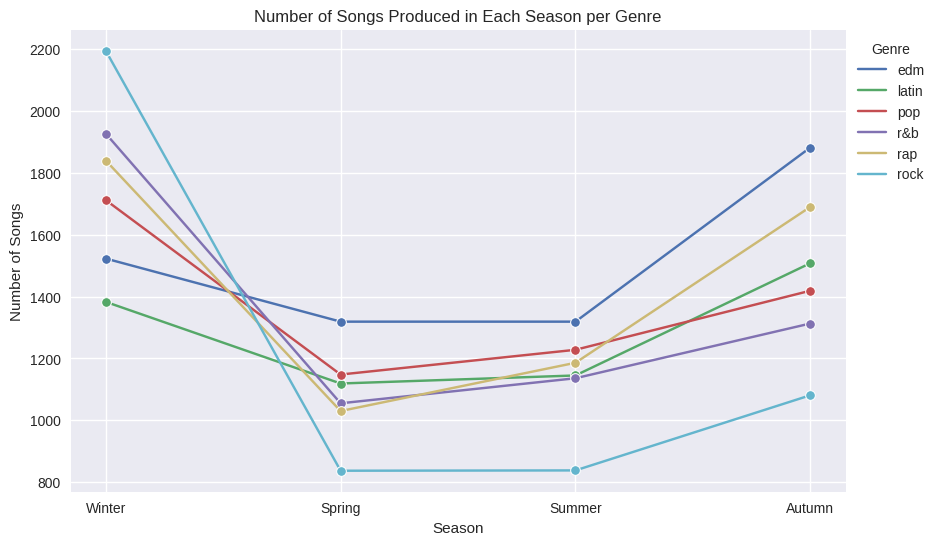

In [ ]:

# Drop unnecessary columns
df2 =df.drop(["track_id", "track_album_id", "playlist_name", "playlist_id", "duration_ms"], axis=1)

# Convert 'track_album_release_date' to datetime
df2['track_album_release_date'] = pd.to_datetime(df2['track_album_release_date'])

# Extract month and year
df2['month'] = df2['track_album_release_date'].dt.month
df2['year'] = df2['track_album_release_date'].dt.year

# Create a new column 'quarter'
df2['quarter'] = pd.cut(
    df2['month'],
    bins=[0, 3, 6, 9, 12],
    labels=['Winter', 'Spring', 'Summer', 'Autumn'],
    include_lowest=True
)

# Group by 'quarter' and count songs for each genre
df2 = df2.groupby(['quarter', 'playlist_genre']).size().reset_index(name='n')

# Plot the data using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(data=df2, x='quarter', y='n', hue='playlist_genre', marker='o')

# Customize the plot (you can adjust these as needed)
plt.xlabel("Season")
plt.ylabel("Number of Songs")
plt.title("Number of Songs Produced in Each Season per Genre")
plt.legend(title='Genre', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

Audio characteristics over year

Text(0.5, 0, 'track_album_release_date')

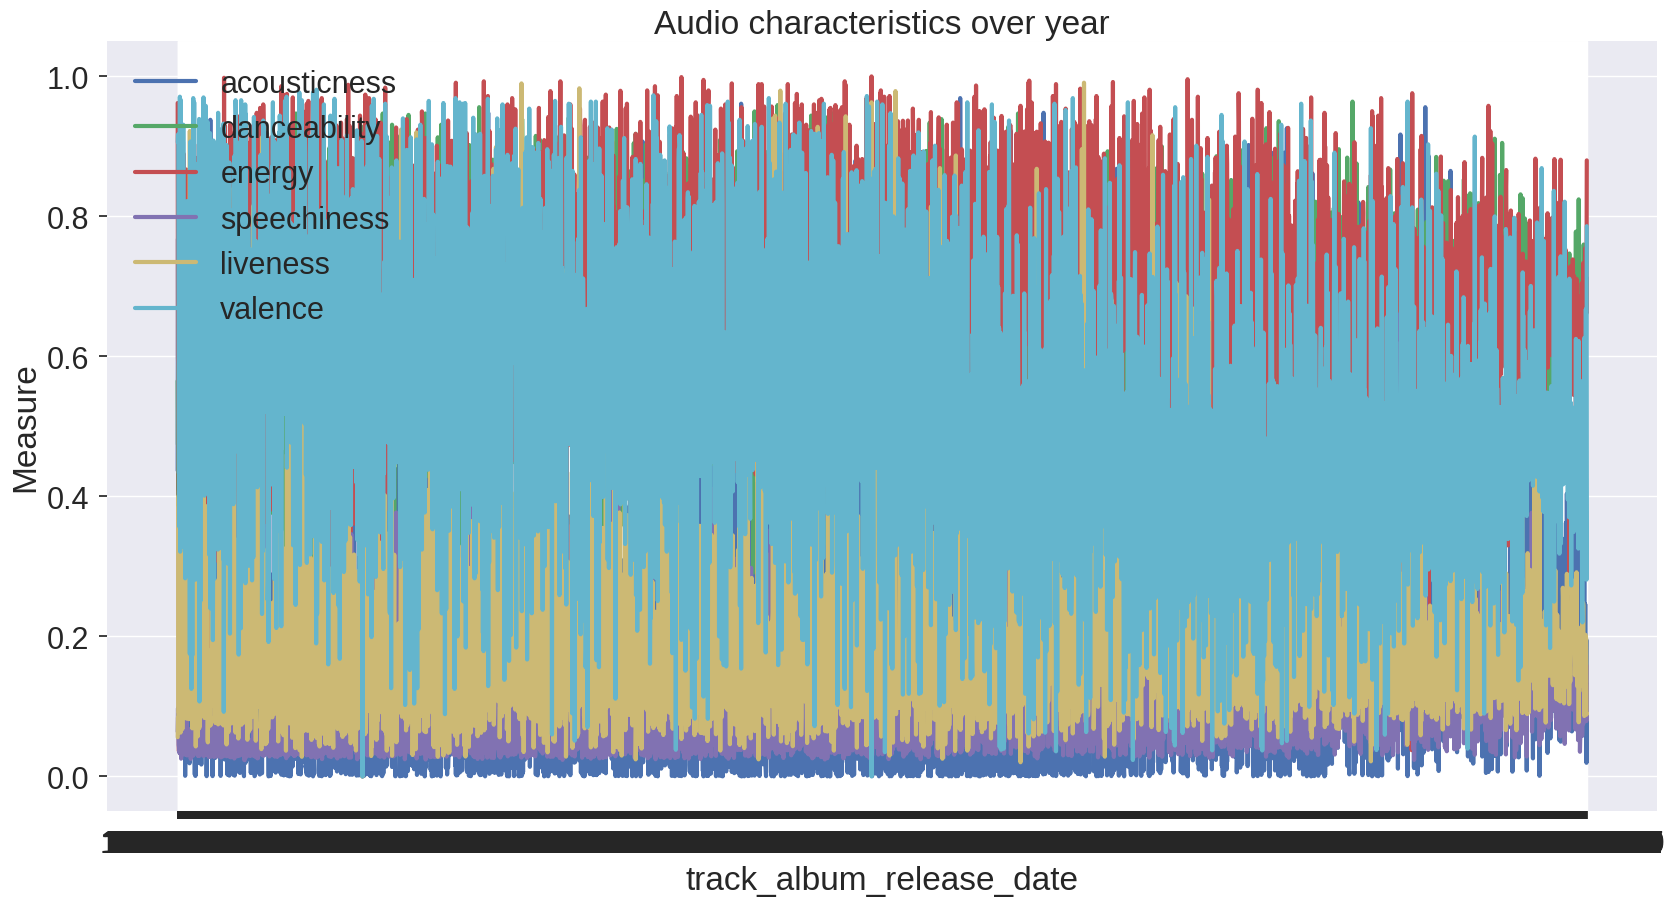

In [ ]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("track_album_release_date")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('track_album_release_date')
